## Toy Python example

In [1]:
 # Ensure python 3 forward compatibility
from __future__ import print_function
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

class SigmoidLayer:
    def __init__(self, n_input, n_output):
        self.W = np.random.randn(n_output, n_input)
        self.b = np.random.randn(n_output, 1)
    def output(self, X):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        return sigmoid(self.W.dot(X) + self.b)

class SigmoidNetwork:

    def __init__(self, layer_sizes):
        '''
        :parameters:
            - layer_sizes : list of int
                List of layer sizes of length L+1 (including the input dimensionality)
        '''
        self.layers = []
        for n_input, n_output in zip(layer_sizes[:-1], layer_sizes[1:]):
            self.layers.append(SigmoidLayer(n_input, n_output))
    
    def train(self, X, y, learning_rate=0.2):
        X = np.array(X)
        y = np.array(y)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        if y.ndim == 1:
            y = y.reshape(1, -1)
        
        # Forward pass - compute a^n for n in {0, ... L}
        layer_outputs = [X]
        for layer in self.layers:
            layer_outputs.append(layer.output(layer_outputs[-1]))
        
        # Backward pass - compute \partial C/\partial z^m for m in {L, ..., 1}
        cost_partials = [layer_outputs[-1] - y]
        for layer, layer_output in zip(reversed(self.layers), reversed(layer_outputs[:-1])):
            cost_partials.append(layer.W.T.dot(cost_partials[-1])*layer_output*(1 - layer_output))
        cost_partials.reverse()
        
        # Compute weight gradient step
        W_updates = []
        for cost_partial, layer_output in zip(cost_partials[1:], layer_outputs[:-1]):
            W_updates.append(cost_partial.dot(layer_output.T)/X.shape[1])
        # and biases
        b_updates = [cost_partial.mean(axis=1).reshape(-1, 1) for cost_partial in cost_partials[1:]]
        
        for W_update, b_update, layer in zip(W_updates, b_updates, self.layers):
            layer.W -= W_update*learning_rate
            layer.b -= b_update*learning_rate

    def output(self, X):
        a = np.array(X)
        if a.ndim == 1:
            a = a.reshape(-1, 1)
        for layer in self.layers:
            a = layer.output(a)
        return a

In [2]:
nn = SigmoidNetwork([2, 2, 1])
X = np.array([[0, 1, 0, 1], 
              [0, 0, 1, 1]])
y = np.array([0, 1, 1, 0])
for n in range(int(1e3)):
    nn.train(X, y, learning_rate=1.)
print("Input\tOutput\tQuantized")
for i in [[0, 0], [1, 0], [0, 1], [1, 1]]:
    print("{}\t{:.4f}\t{}".format(i, nn.output(i)[0, 0], 1*(nn.output(i)[0] > .5)))

Input	Output	Quantized
[0, 0]	0.5058	[1]
[1, 0]	0.4903	[0]
[0, 1]	0.9871	[1]
[1, 1]	0.0162	[0]


interactive(children=(IntSlider(value=5, description='beta', max=25, min=-1), Output()), _dom_classes=('widget…

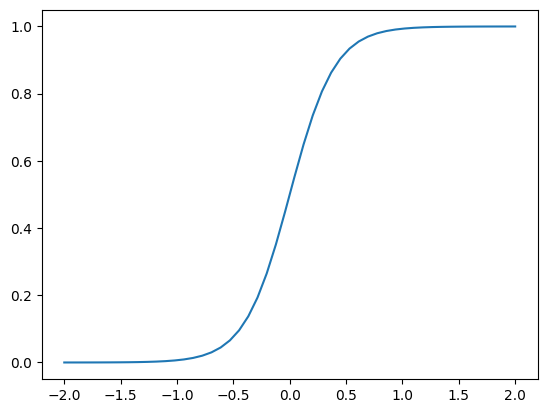

In [3]:
import ipywidgets as widgets
from ipywidgets import *
import matplotlib.pyplot as plt
logistic = lambda h, beta: 1./(1 + np.exp(-beta * h))

@interact(beta=(-1, 25))
def logistic_plot(beta=5):
    hvals = np.linspace(-2, 2)
    plt.plot(hvals, logistic(hvals, beta))

interactive(children=(IntSlider(value=5, description='theta', max=25, min=-1), Output()), _dom_classes=('widge…

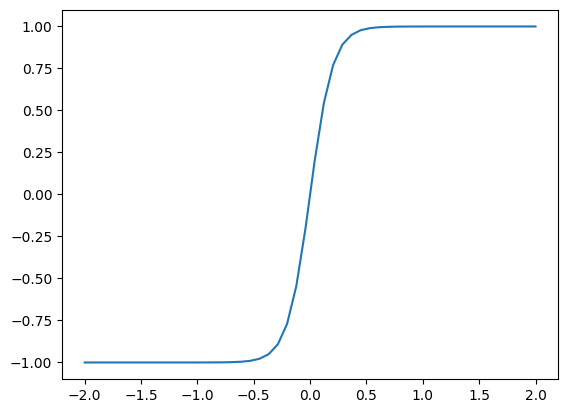

In [4]:
hyperbolic_tangent = lambda h: (np.exp(h) - np.exp(-h)) / (np.exp(h) + np.exp(-h))

@interact(theta=(-1, 25))
def tanh_plot(theta=5):
    hvals = np.linspace(-2, 2)
    h = hvals*theta
    plt.plot(hvals, hyperbolic_tangent(h))